<a href="https://colab.research.google.com/github/bala-codes/MALARIA-CELLS-PARASITE-CLASSIFIER-USING-DEEP-LEARNING/blob/master/codes%20(FASTAI)/1.%20Malaria%20Cell%20Classifier%20FASTAI%20RESNET16%20and%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
!pip install torch torchvision fastai

'''
fastai                   1.0.59     
torch                    1.3.1      
torchsummary             1.5.1      
torchtext                0.3.1      
torchvision              0.4.2   
'''

fastai                   1.0.61         
torch                    1.5.0+cu101    
torchsummary             1.5.1          
torchtext                0.3.1          
torchvision              0.6.0+cu101    


'\nfastai                   1.0.59     \ntorch                    1.3.1      \ntorchsummary             1.5.1      \ntorchtext                0.3.1      \ntorchvision              0.4.2   \n'

In [ ]:
%%time

import os
labels = os.listdir("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/"+label))))

No. of labels: 2
-----------------
Parasitized, 13780 files
Uninfected, 13780 files
CPU times: user 8.94 ms, sys: 11.6 ms, total: 20.5 ms
Wall time: 240 ms


Populating the interactive namespace from numpy and matplotlib


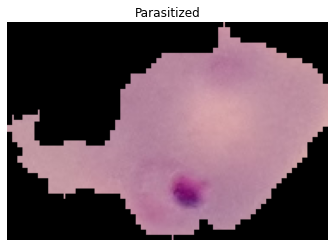

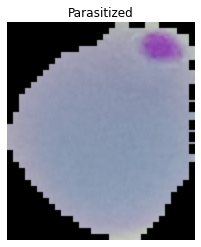

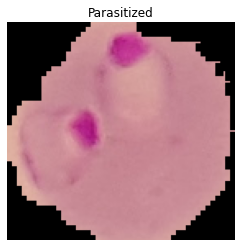

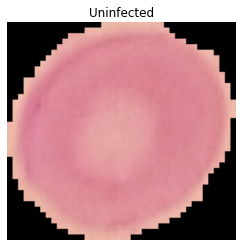

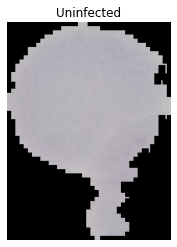

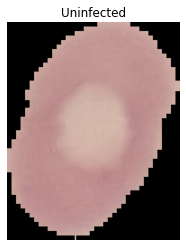

CPU times: user 543 ms, sys: 43.8 ms, total: 587 ms
Wall time: 4.43 s


In [ ]:
%%time
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(2):
  for j in range(3):
    image_name = np.random.choice(os.listdir("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/" + labels[i]))
    img = mpimg.imread(os.path.join('/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/',labels[i],image_name))
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('ggplot')

def plotter(prediction):
  prediction1 = prediction
  final = str(prediction1[0])
  scores = prediction1[2]
  a = float(scores[0])
  b = float(scores[1])

  start = "\033[1m"
  end = "\033[0;0m"
  print("OUTPUT - "+ start + str(final) + end)
  print()
  class_labels = ['INFECTED','UNINFECTED']
  j = [a,b]
  y_pos = np.arange(len(class_labels))
  colors = ['r', 'g']
  plt.barh(y_pos, j, color = colors, alpha=0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING AFFECTED BY MALARIA')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.core import *
from fastai.metrics import accuracy
from fastai.callbacks import *

In [ ]:
%%time

path = "/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/"
size = 128
bs = 64

data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True), valid_pct=0.15, size=size, bs=bs).normalize(imagenet_stats)
data

CPU times: user 1.14 s, sys: 73 ms, total: 1.21 s
Wall time: 34.2 s


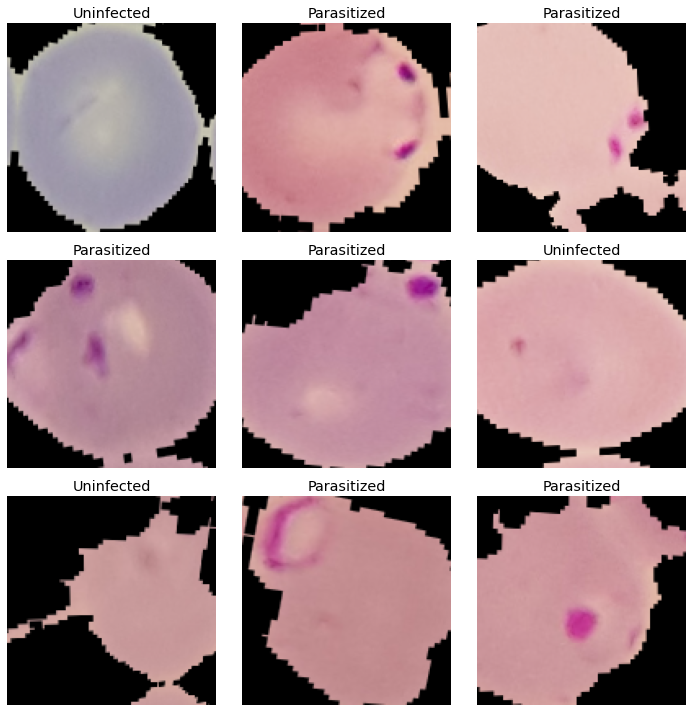

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
data.classes

['Parasitized', 'Uninfected']

In [ ]:
# https://docs.fast.ai/vision.models.html
learner = cnn_learner(data, models.vgg19_bn, metrics=[accuracy, error_rate], callback_fns=ShowGraph) 
x = 'VGG19'

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


In [ ]:
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [1]:
%%time
learner.lr_find()
learner.recorder.plot()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [ ]:
learner.model_dir='/content/models-VGG19/'

def learner_outputs():
    interpreter = ClassificationInterpretation.from_learner(learner)
    print(interpreter.most_confused(min_val=2))
    interpreter.plot_top_losses(4, figsize=(10,10), heatmap = False)
    interpreter.plot_confusion_matrix(figsize=(4,4), dpi=120)
  
def learner_outputs_outs(num):
    import numpy as np
    interpreter = ClassificationInterpretation.from_learner(learner)
    print(interpreter.most_confused(min_val=2))
    interpreter.plot_top_losses(4, figsize=(10,10), heatmap = True)
    interpreter.plot_confusion_matrix(figsize=(8,8), dpi=120)
    y_pred, y_true = learner.get_preds()
    y_true_out = np.zeros([y_pred.shape[0],y_pred.shape[1]]) # Give the shape of y_pred in brain 
    for i,x in enumerate(y_true):
        y_true_out[i][x] = 1
        
    outfile1 = str(num)+".y_true.npy"
    np.save(outfile1, y_true_out)
    
    y_pred = y_pred.numpy()
    outfile2 = str(num)+".y_preds.npy"
    np.save(outfile2, y_pred)

# STAGE - 1

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.272640,0.174320,0.944108,0.055892,53:57
1,0.214834,0.162761,0.949915,0.050085,03:21
2,0.162729,0.111495,0.965400,0.034600,03:22
3,0.150004,0.111307,0.965158,0.034842,03:23
4,0.143889,0.105946,0.963465,0.036535,03:23
5,0.121499,0.095140,0.968788,0.031212,03:23
6,0.117777,0.093674,0.970723,0.029277,03:22
7,0.124558,0.087816,0.972659,0.027341,03:23
8,0.106130,0.085556,0.973143,0.026857,03:23
9,0.115134,0.085551,0.972901,0.027099,03:23


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

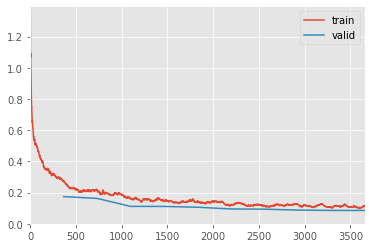

Better model found at epoch 0 with accuracy value: 0.9441083669662476.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Better model found at epoch 1 with accuracy value: 0.9499152898788452.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Better model found at epoch 2 with accuracy value: 0.9654004573822021.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Better model found at epoch 5 with accuracy value: 0.9687877893447876.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Better model found at epoch 6 with accuracy value: 0.9707234501838684.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Better model found at epoch 7 with accuracy value: 0.9726591110229492.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Better model found at epoch 8 with accuracy value: 0.9731429815292358.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

CPU times: user 20min 34s, sys: 13min 2s, total: 33min 37s
Wall time: 1h 24min 28s


In [ ]:
%%time
i = 1

modelname = ('stage-{}-MALARIA-{}-epoch'.format(i,x))
picklename = ('stage-{}-MALARIA-{}.pkl'.format(i,x))
path = "/content/models-VGG19/"

learner.fit_one_cycle(10, callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name=modelname)], max_lr=slice(1e-4, 1e-2))

learner.save(path+modelname)
learner.export(path+picklename)

[('Parasitized', 'Uninfected', 60), ('Uninfected', 'Parasitized', 51)]


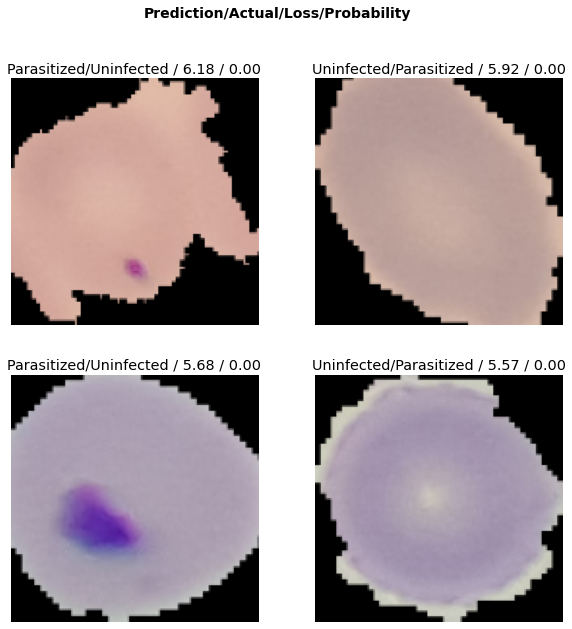

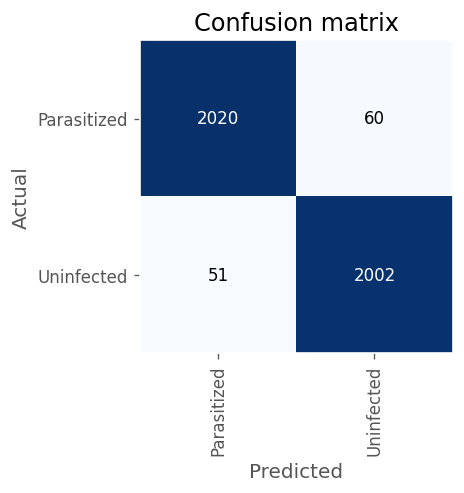

In [ ]:
learner_outputs()

# STAGE - 2

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.125967,0.109450,0.962981,0.037019,04:56
1,0.124108,0.090956,0.966852,0.033148,04:52
2,0.137069,0.119899,0.962981,0.037019,04:51
3,0.153920,0.105000,0.963707,0.036293,04:51
4,0.137797,0.155734,0.952577,0.047423,04:51
5,0.139967,0.114018,0.962739,0.037261,04:50
6,0.136073,0.092786,0.965642,0.034358,04:50
7,0.137102,0.090752,0.966610,0.033390,04:51
8,0.123690,0.084930,0.968062,0.031938,04:50
9,0.112735,0.104130,0.965884,0.034116,04:49


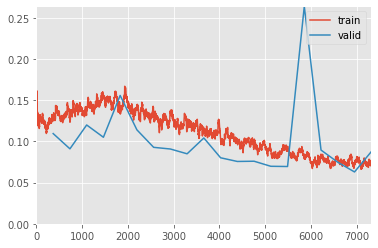

Better model found at epoch 0 with error_rate value: 0.037019114941358566.
Better model found at epoch 4 with error_rate value: 0.04742318019270897.
CPU times: user 57min 46s, sys: 37min 45s, total: 1h 35min 31s
Wall time: 1h 37min 9s


In [ ]:
%%time
learner.unfreeze()

i = 2

modelname = ('stage-{}-MALARIA-{}-epoch'.format(i,x))
picklename = ('stage-{}-MALARIA-{}.pkl'.format(i,x))
path = "/content/models-VGG19/"

learner.fit_one_cycle(20, callbacks=[SaveModelCallback(learner, every='improvement', monitor='error_rate', name=modelname)], max_lr=slice(1e-4, 1e-2))

learner.save(path+modelname)
learner.export(path+picklename)

[('Parasitized', 'Uninfected', 112), ('Uninfected', 'Parasitized', 84)]
CPU times: user 9.94 s, sys: 6.14 s, total: 16.1 s
Wall time: 20 s


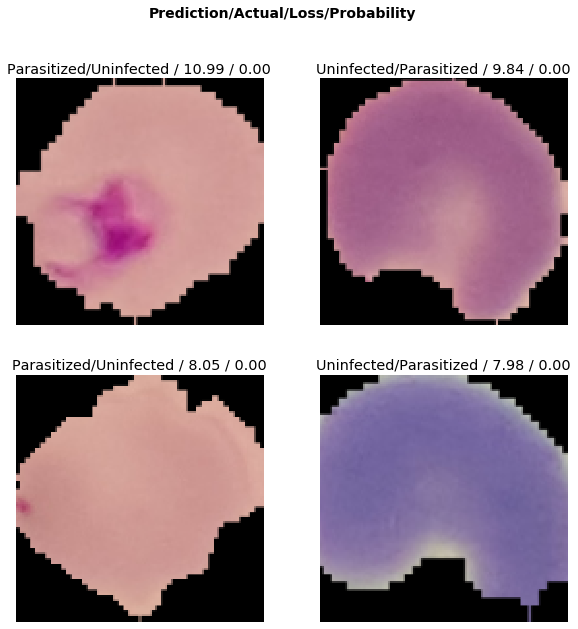

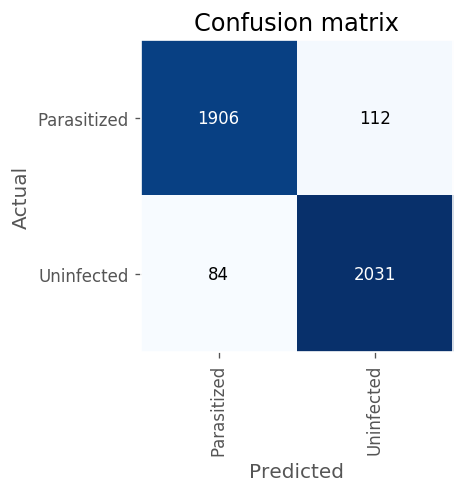

In [ ]:
%%time 
learner_outputs()

# STAGE - 3


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.114625,0.109959,0.966126,0.033874,04:51
1,0.110312,0.085538,0.967094,0.032906,04:52
2,0.111136,0.090777,0.968546,0.031454,04:52
3,0.118783,0.101591,0.962739,0.037261,04:51
4,0.127940,0.091916,0.967820,0.032180,04:51
5,0.130297,0.192511,0.960319,0.039681,04:50
6,0.126283,0.088194,0.970240,0.029760,04:50
7,0.118736,0.085542,0.969756,0.030244,04:50
8,0.113034,0.090629,0.968062,0.031938,04:50
9,0.105913,0.085317,0.972175,0.027825,04:50


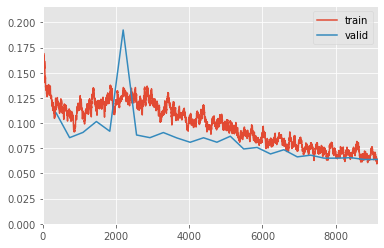

Better model found at epoch 0 with error_rate value: 0.033873699605464935.
Better model found at epoch 3 with error_rate value: 0.03726106882095337.
Epoch 4: reducing lr to 0.0015199999999999999
Better model found at epoch 5 with error_rate value: 0.03968061879277229.
Epoch 7: reducing lr to 0.0019959743100980633
Epoch 13: reducing lr to 0.0013930274595537972
CPU times: user 1h 12min 8s, sys: 47min 6s, total: 1h 59min 15s
Wall time: 2h 1min 16s


In [ ]:
%%time

i = 3

modelname = ('stage-{}-MALARIA-{}-epoch'.format(i,x))
picklename = ('stage-{}-MALARIA-{}.pkl'.format(i,x))
path = "/content/models-VGG19/"

learner.fit_one_cycle(25, max_lr=slice(1e-4, 1e-2), callbacks=[SaveModelCallback(learner, every='improvement', monitor='error_rate', name = modelname),
                                                               ReduceLROnPlateauCallback(learner, monitor = 'valid_loss', mode = 'auto', patience = 2, factor = 0.2, min_delta = 0.0001, min_lr = 0.001)])

learner.save(path+modelname)
learner.export(path+picklename)

[('Uninfected', 'Parasitized', 84), ('Parasitized', 'Uninfected', 80)]
CPU times: user 9.7 s, sys: 6.03 s, total: 15.7 s
Wall time: 20 s


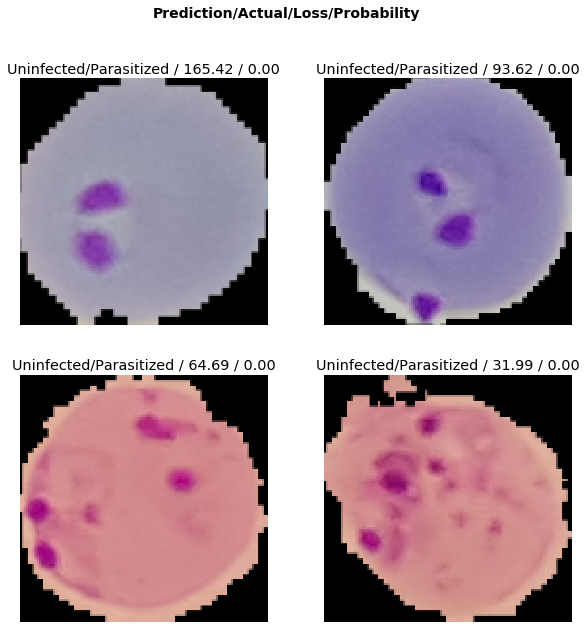

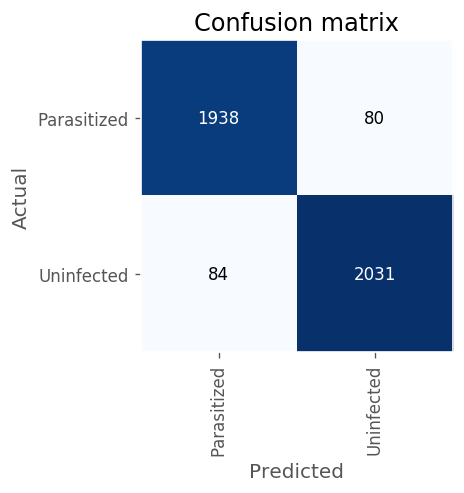

In [ ]:
%%time 
learner_outputs()

In [ ]:
!cp -r '/content/models-VGG19' '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/Pretrained Models'

# Loading Pretrained Model Files

In [ ]:
learnerfinal = learner.load("/content/models-VGG19/stage-3-MALARIA-VGG19-epoch")

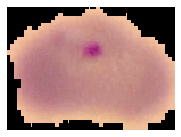

In [ ]:
testimg = open_image("/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/MALARIA DETECTION - FINAL DATASETS/CELL_IMAGES/Parasitized/C33P1thinF_IMG_20150619_115808a_cell_205.png")
testimg.show()

OUTPUT - Parasitized



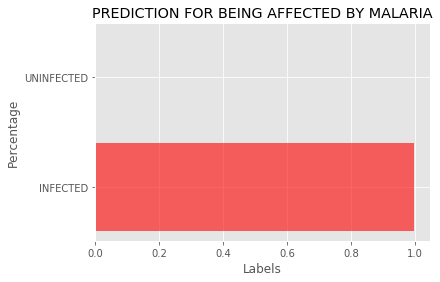

CPU times: user 235 ms, sys: 1.53 s, total: 1.77 s
Wall time: 2.12 s


In [ ]:
%%time
prediction = learnerfinal.predict(testimg)
plotter(prediction)

# OUTPUTS FOR VGG19

MODEL 1


MODEL 2


MODEL 3


cp: cannot stat '/content/models-VGG16/stage-3-MALARIA-VGG16-epoch.pth': No such file or directory
CPU times: user 29.6 s, sys: 19.8 s, total: 49.4 s
Wall time: 1min 7s


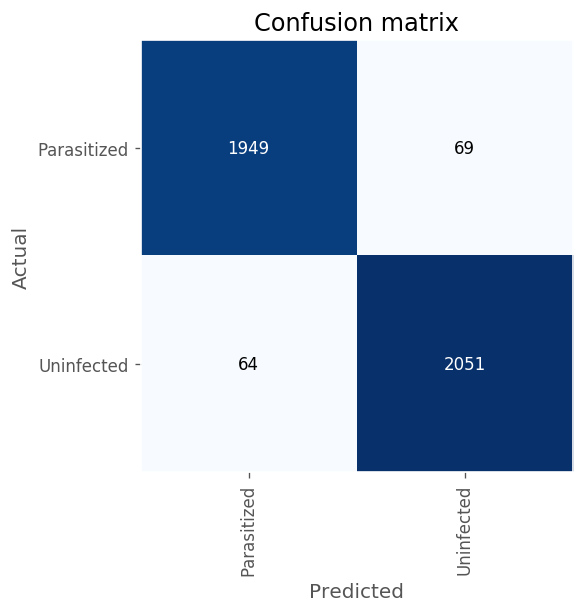

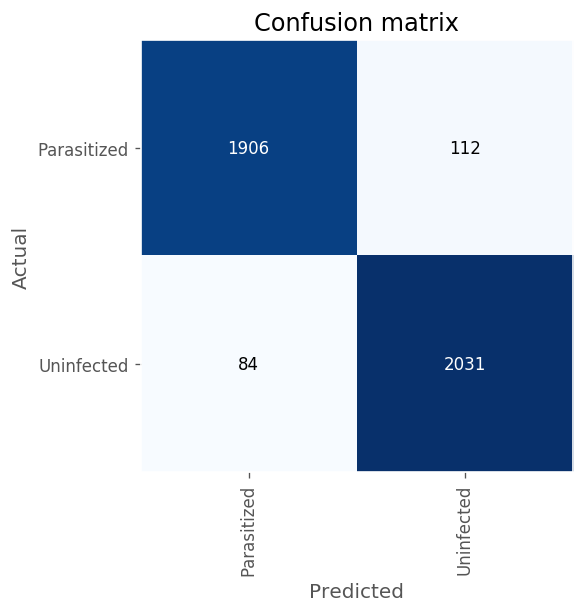

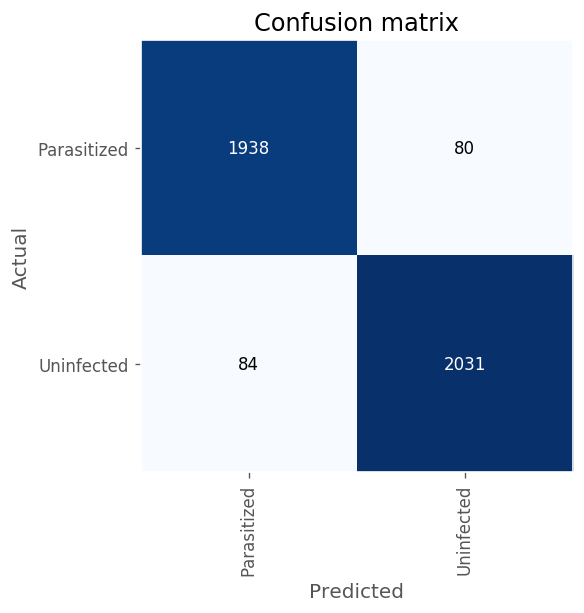

In [ ]:
%%time
X = ['/content/models-VGG19/stage-1-MALARIA-VGG19-epoch','/content/models-VGG19/stage-2-MALARIA-VGG19-epoch','/content/models-VGG19/stage-3-MALARIA-VGG19-epoch']

def confusion_matrix(PATHS):
  learner2 = learner.load(PATHS)
  interpreter = ClassificationInterpretation.from_learner(learner2)
  interpreter.most_confused(min_val=2)
  interpreter.plot_confusion_matrix(figsize=(5,5), dpi=120)


for i in range(len(X)):
  y = X[i]
  # x = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/Pretrained Models/FASTAI models/RESNET-18-TL-MODELS/' + y
  print("MODEL {}".format(i+1))
  confusion_matrix(PATHS = y) # x



# OUTPUTS FOR RESNET16

MODEL 1


MODEL 2


MODEL 3


CPU times: user 5.52 s, sys: 2.13 s, total: 7.65 s
Wall time: 51.3 s


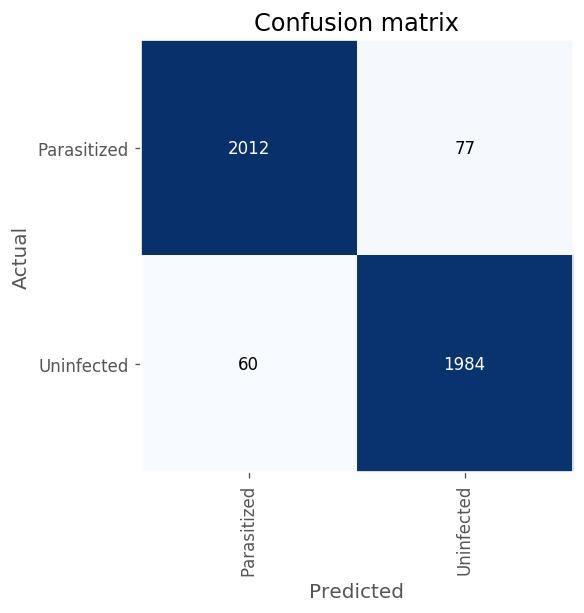

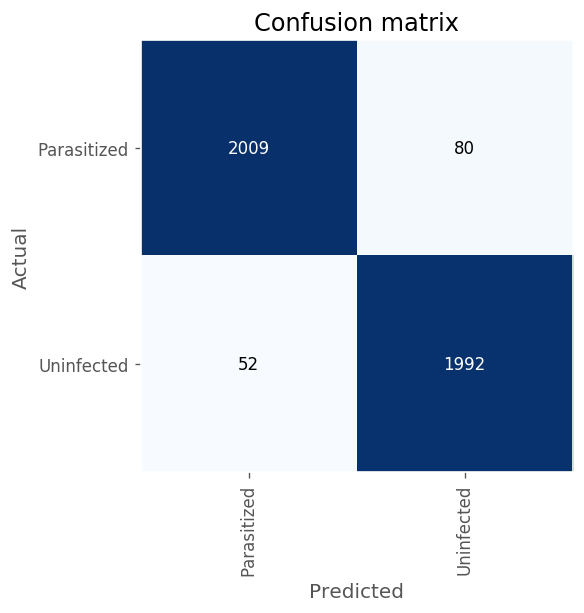

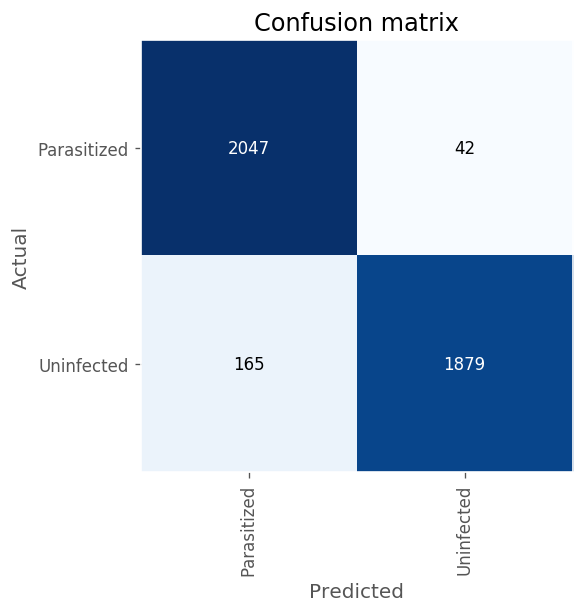

In [ ]:
%%time
X = ['/content/models/stage-1-MALARIA-RESNET16-epoch','/content/models/stage-2-MALARIA-RESNET16-epoch','/content/models/stage-3-MALARIA-RESNET16-epoch']

def confusion_matrix(PATHS):
  learner2 = learner.load(PATHS)
  interpreter = ClassificationInterpretation.from_learner(learner2)
  interpreter.most_confused(min_val=2)
  interpreter.plot_confusion_matrix(figsize=(5,5), dpi=120)


for i in range(len(X)):
  y = X[i]
  # x = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/Pretrained Models/FASTAI models/RESNET-18-TL-MODELS/' + y
  print("MODEL {}".format(i+1))
  confusion_matrix(PATHS = y) # x

!cp -r '/content/models' '/content/drive/My Drive/Machine Learning Projects/MEDICAL - MALARIA CELLS CLASSIFIER/SOURCE CODES AND DATASETS/Pretrained Models'